# Advanced Classification Bank

In this notebook, we will cover:

* Decision Tree Classifier
* Random Forest Classifier
* XGBoost Classifier
* AdaBoost
* Hyperparameter Tuning by GridSearchCV (Random Forest)
* Hyperparameter Tuning by Randomized Search (Random Forest)

Importing all necessary packages

In [7]:
!pip install xgboost

In [8]:
!pip install pydotplus

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### Task 1: Load Data 'Wrangledbank.csv'

In [2]:
#write code here
data = pd.read_csv("wrangledbank.csv")
df = data.copy()
df.head()

,marital,education,default,housing,loan,contact,poutcome,y,agecat,balcat,daycat,monthcat,durationcat,campaigncat,pdayscat,previouscat,jobcat
0,1,2,0,1,0,2,3,0,3,3,0,3,3,0,4,0,5
1,2,1,0,1,0,2,3,0,2,1,0,3,2,0,4,0,0
2,1,1,0,1,1,2,3,0,1,1,0,3,0,0,4,0,1
3,1,3,0,1,0,2,3,0,2,3,0,3,0,0,4,0,0
4,2,3,0,0,0,2,3,0,1,1,0,3,2,0,4,0,4


In [3]:
#Summary of wrangled normalize data set
df.describe()

,marital,education,default,housing,loan,contact,poutcome,y,agecat,balcat,daycat,monthcat,durationcat,campaigncat,pdayscat,previouscat,jobcat
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,1.167725,1.224813,0.018027,0.555838,0.160226,0.640242,2.559974,0.116985,1.567649,1.472164,1.808498,2.116941,1.743027,0.395634,3.562407,0.182787,1.960518
std,0.608230,0.747997,0.133049,0.496878,0.366820,0.897951,0.989059,0.321406,0.996608,1.093037,1.465944,1.163733,1.459052,1.303003,1.036117,0.387068,2.250437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,1.000000,1.000000,1.000000,3.000000,2.000000,0.000000,4.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,2.000000,3.000000,3.000000,3.000000,3.000000,0.000000,4.000000,0.000000,5.000000
max,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,4.000000,3.000000,5.000000


In [8]:
# our normalized data set having the same shape as we had in original main data set (no addition, no loss in data set)
df.shape

(45211, 17)

In [4]:
#counts of unique values in processed and normalized data
df.nunique()

marital        3
education      4
default        2
housing        2
loan           2
contact        3
poutcome       4
y              2
agecat         5
balcat         5
daycat         5
monthcat       4
durationcat    6
campaigncat    6
pdayscat       5
previouscat    4
jobcat         6
dtype: int64

In [5]:
#data type of each column in normalized data
df.dtypes

marital        int64
education      int64
default        int64
housing        int64
loan           int64
contact        int64
poutcome       int64
y              int64
agecat         int64
balcat         int64
daycat         int64
monthcat       int64
durationcat    int64
campaigncat    int64
pdayscat       int64
previouscat    int64
jobcat         int64
dtype: object

In [9]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

As we can see that our main bank dataset the counts of unique values in default column were same as above normalized data set default column have.

In [10]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [5]:
df.isnull().sum()

marital        0
education      0
default        0
housing        0
loan           0
contact        0
poutcome       0
y              0
agecat         0
balcat         0
daycat         0
monthcat       0
durationcat    0
campaigncat    0
pdayscat       0
previouscat    0
jobcat         0
dtype: int64

###  One Hot encoding for categorical varaibles in main data set df_eda and store in df

In [43]:
#one hot encoding of few object type columns in main bank data set
df_OneHot=pd.get_dummies(df_eda,columns=['job','marital','education','contact','month','poutcome'])
df_OneHot.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


In [70]:
#Exporting the csv file after one hot encode
df=df_OneHot.copy()
export_csv = df.to_csv (r'bank_withDumies.csv', index = None, header=True)

One hot encode allows us to minimize the work of normaliztion of data but it increases the input variable (columns)
but here we are not using the dataset after one hot encoding. mighht be in future we can evaluate the working of it.

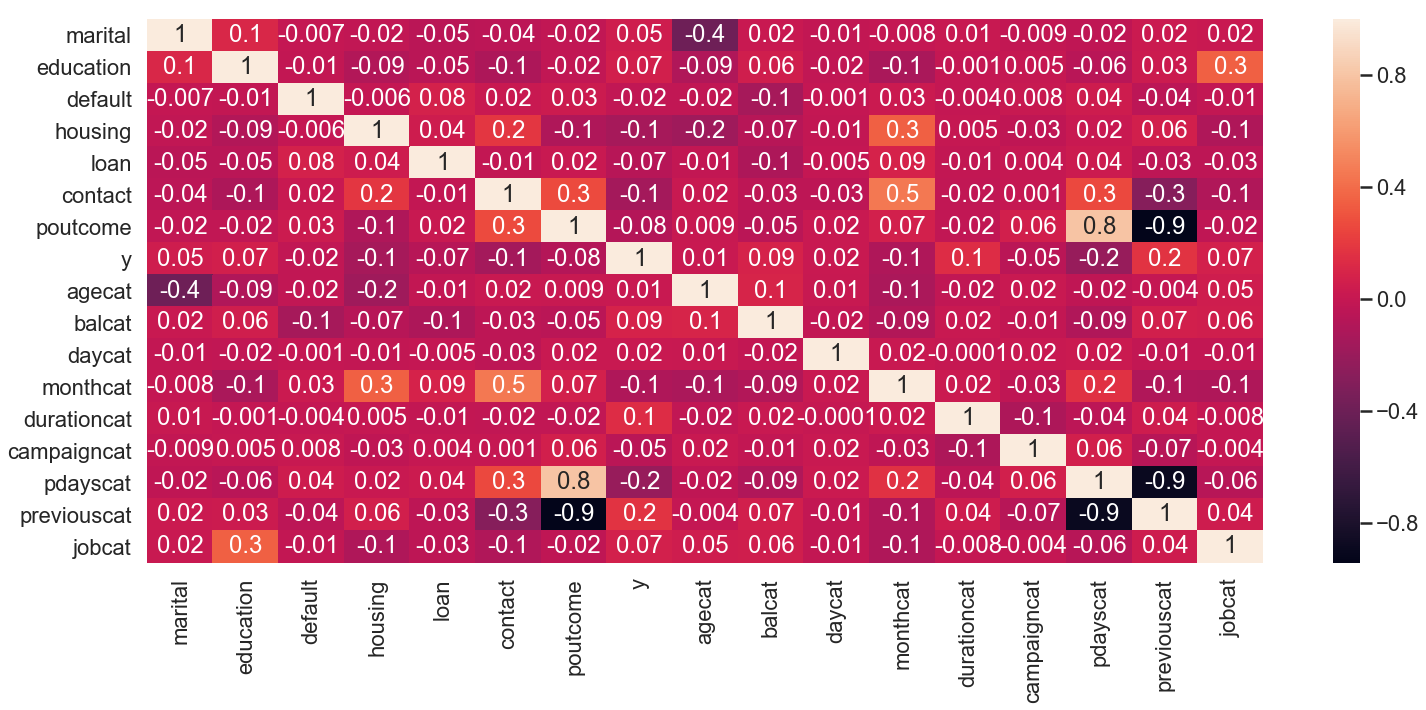

In [6]:
#Feature Selection
sns.set_context('poster')
plt.figure(figsize=(25,10))
cor = df.corr()
sns.heatmap(cor, annot=True, fmt='.1g');

We can select different features for cluster analysis and association mining by analyzing highly correlated features.

## Classification:Implementation of classifiers

### Task 2: Create dependent and independent varaibles

In [4]:
#Splitting the target variable from dataset for implementing and evaluating classifiers results
X = df.drop(columns=['y'],axis=1)
Y = df[('y')]
Y.head()
# X have input variables which ae 16 columns and Y have single target variable which is 'y'.

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [12]:
#first five rows of X.
X.head()

,marital,education,default,housing,loan,contact,poutcome,agecat,balcat,daycat,monthcat,durationcat,campaigncat,pdayscat,previouscat,jobcat
0,1,2,0,1,0,2,3,3,3,0,3,3,0,4,0,5
1,2,1,0,1,0,2,3,2,1,0,3,2,0,4,0,0
2,1,1,0,1,1,2,3,1,1,0,3,0,0,4,0,1
3,1,3,0,1,0,2,3,2,3,0,3,0,0,4,0,0
4,2,3,0,0,0,2,3,1,1,0,3,2,0,4,0,4


In [13]:
#First five rows of Y 
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

### Task 3: Split the data into training and testing set and set the random state to 100 for same splitting and results

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# Write code here 
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,random_state=100)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(31647, 16) (31647,)
(13564, 16) (13564,)


## task 4:Defining and implementing Decision Tree classifier

In [16]:
#importing decision tree classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

In [17]:
#Defining decision tree classifier
clf_dt = DecisionTreeClassifier(max_depth=3,criterion='gini',random_state=25)

In [18]:
#Train the decision tree classifier on training part of data.
clf_dt.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=25,
            splitter='best')

In [19]:
#Run the trainned algorithm by providing test data to predict the target variable.
dt_pred = clf_dt.predict(xtest)
dt_pred_prb=clf_dt.predict_proba(xtest)[:,1]

### Task 5: Find accuracy of trainned Decision Tree classifier of prediction of target variable on test data

In [12]:
#import the accuracy metric for evaluation.
from sklearn.metrics import accuracy_score

In [21]:
#performance of decision tree classifier on accuracy evaluation metric.
accuracy_dt = accuracy_score(ytest,dt_pred)
print("Accuracy: {}".format(accuracy_dt))

Accuracy: 0.8845473311707461


### Task 6: Find precision of trainned  Decision Tree classifier of predicting target variable in test data

In [13]:
#import precesion performance metric for evaluation.
from sklearn.metrics import precision_score

In [23]:
#Performance of decsion tree classifier on precision evaluation metric.
precision_dt=precision_score(ytest,dt_pred)
print("Precision: {}".format(precision_dt))

Precision: 0.5078979343863913


### Task 7: Find Recall for Decision Tree classifier

In [14]:
#import recall performance metric for evaluation
from sklearn.metrics import recall_score

In [25]:
#Performance of decision tree classifier on recall evaluation metric 
recall_dt = recall_score(ytest,dt_pred)
print("Recall: {}".format(recall_dt))

Recall: 0.26472450918302726


### Task 8: Find F1 Score for Decision Tree

In [15]:
#import f1 score performance metric for evaluation
from sklearn.metrics import f1_score

In [27]:
#Performance of decsion tree classifier on f1 score evaluation metric
dt_f1=f1_score(ytest,dt_pred)
print("F1 Score: {}".format(dt_f1))

F1 Score: 0.3480432972522898


### Task 9: Print Classification Report for Decision Tree

In [28]:
#import the report generator from sklearn
from sklearn.metrics import classification_report

In [29]:
#print the classification report having performance on different metrices.
print(classification_report(ytest,dt_pred))

             precision    recall  f1-score   support

          0       0.91      0.97      0.94     11985
          1       0.51      0.26      0.35      1579

avg / total       0.86      0.88      0.87     13564



### ROC Curve<br>
Defining function to plot ROC AUC Curve

In [30]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

In [31]:
from sklearn.metrics import auc,roc_curve,roc_auc_score

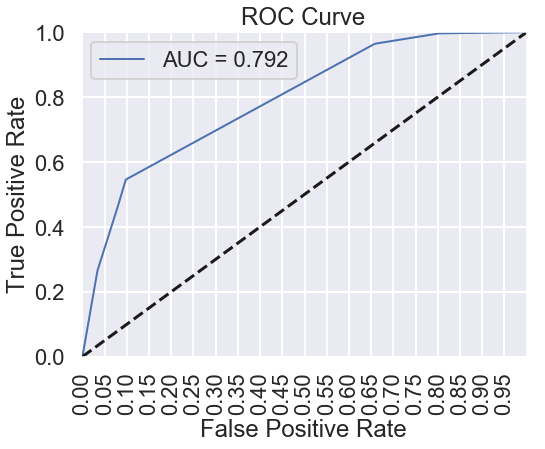

In [32]:
sns.set_context('poster')
auc_dt=roc_auc_score(ytest,dt_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,dt_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_dt)

## Ploting Decision Tree

Loading packages and ploting decsion tree we should follow the following steps.

In [8]:
 pip --version


The following command must be run outside of the IPython shell:

    $ pip --version

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [3]:
!pip install --upgrade pip

ERROR: To modify pip, please run the following command:
C:\Users\fahim\Anaconda3\python.exe -m pip install --upgrade pip
You are using pip version 10.0.1, however version 21.2.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
! pip install grpahviz

ERROR: Could not find a version that satisfies the requirement grpahviz (from versions: none)
ERROR: No matching distribution found for grpahviz


In [33]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

Download Graphviz 2.38 from this [link](https://graphviz.gitlab.io/_pages/Download/Download_windows.html) and install. Then run below line as per your intallation path. (This step is one time)

In [34]:
import os
os.environ["Path"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [35]:
dot_data = StringIO()

In [36]:
export_graphviz(clf_dt, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=list(X.columns))

In [37]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

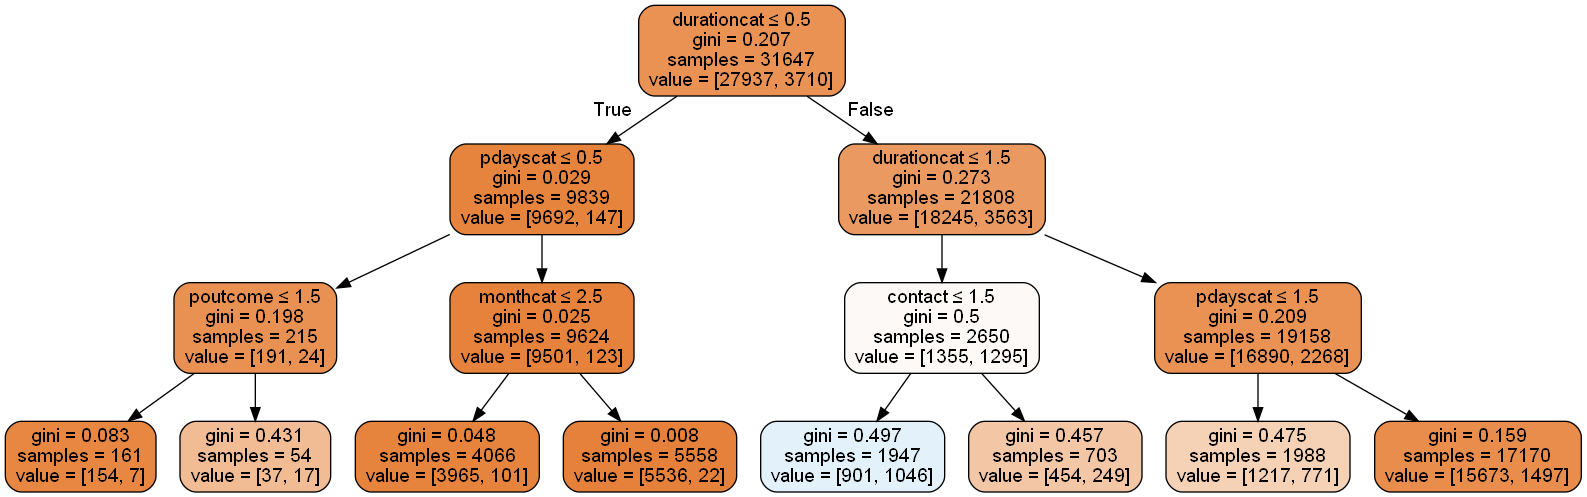

In [38]:
Image(graph.create_png())

Exporting PNG file of Decision Trees

In [148]:
graph.write_png('Decision Tree_Titanic.png')

True

## Features Importance

In [39]:
clf_dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02650048, 0.00455913, 0.        , 0.        , 0.        ,
       0.00156803, 0.71761374, 0.        , 0.24975863, 0.        ,
       0.        ])

In [40]:
features_tuple=list(zip(X.columns,clf_dt.feature_importances_))

In [41]:
features_tuple

[('marital', 0.0),
 ('education', 0.0),
 ('default', 0.0),
 ('housing', 0.0),
 ('loan', 0.0),
 ('contact', 0.026500475227557916),
 ('poutcome', 0.0045591280158078454),
 ('agecat', 0.0),
 ('balcat', 0.0),
 ('daycat', 0.0),
 ('monthcat', 0.0015680267531435917),
 ('durationcat', 0.7176137413862903),
 ('campaigncat', 0.0),
 ('pdayscat', 0.24975862861720033),
 ('previouscat', 0.0),
 ('jobcat', 0.0)]

In [40]:
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])

In [41]:
feature_imp=feature_imp.sort_values("Importance",ascending=False)

Text(0.5,1,'Decision Classifier - Features Importance')

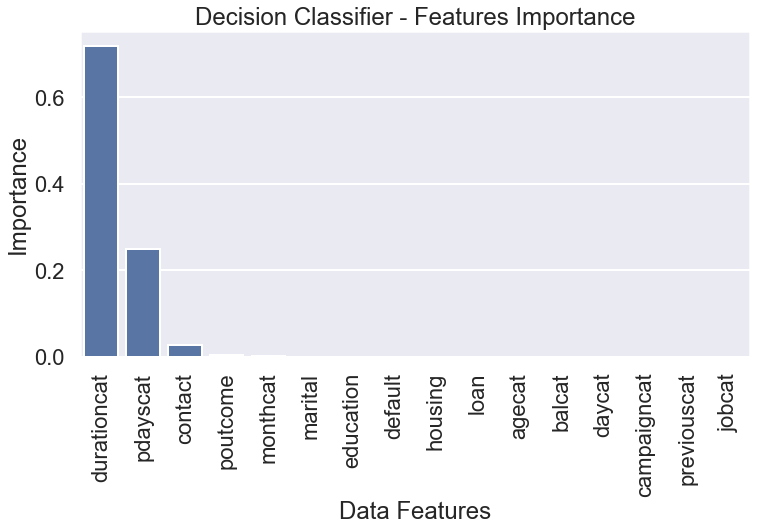

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='b')
plt.xlabel("Data Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Decision Classifier - Features Importance")

Analysis result: After decision tree classifier implementation, durationcat and pdayscat have significant importance for maketing campaign.

# Random Forest

### Defining Random Forest classifier

In [43]:
#import random forest classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

C:\Users\fahim\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [44]:
#defining random forest classifier
clf_rf = RandomForestClassifier(random_state=100)

In [45]:
#Train the random forest classifier on training data.
clf_rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [46]:
#predict the target variable in test data through trainned random forest classifier 
rf_pred = clf_rf.predict(xtest)
rf_pred_prb=clf_rf.predict_proba(xtest)[:,1]

### Task 10: Find Precision for Random Forest

In [47]:
#Performance evaluation on precision metric
precision_rf=precision_score(ytest,rf_pred)
print("Precision: {}".format(precision_rf))

Precision: 0.536205316223648


### Task 11: Find Accuracy for Random Forest

In [48]:
#Performance evaluation on raccuracy metric
accuracy_rf = accuracy_score(ytest,rf_pred)
print("Accuracy: {}".format(accuracy_rf))

Accuracy: 0.8894131524624005


### Task 12: Find Recall for Random Forest

In [49]:
#Perforamnce evaluation on recall metric
recall_rf = recall_score(ytest,rf_pred)
print("Recall: {}".format(recall_rf))

Recall: 0.37048765041165294


### Task 13: Find F1 Score for Random Forest

In [50]:
#Performance evaluation on f1 score metric
rf_f1=f1_score(ytest,rf_pred)
print("F1 Score: {}".format(rf_f1))

F1 Score: 0.4382022471910112


### Task 14: Print Classification Report for Random Forest

In [51]:
from sklearn.metrics import classification_report

In [52]:
#write code here 
print(classification_report(ytest, rf_pred))

             precision    recall  f1-score   support

          0       0.92      0.96      0.94     11985
          1       0.54      0.37      0.44      1579

avg / total       0.88      0.89      0.88     13564



### ROC Curve for Random Forest<br>
Defining the function

In [53]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

In [54]:
from sklearn.metrics import auc,roc_curve,roc_auc_score

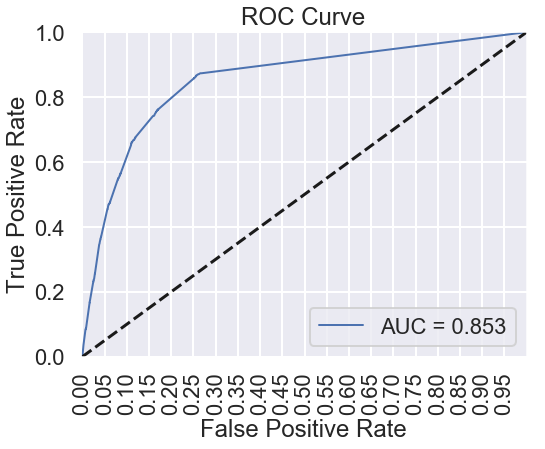

In [55]:
auc_rf=roc_auc_score(ytest,rf_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,rf_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_rf)

### Features Importance

In [ ]:
features_tuple=list(zip(X.columns,clf_rf.feature_importances_))
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])
feature_imp=feature_imp.sort_values("Importance",ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='b')
plt.xlabel("Data Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Random Forest Classifier - Features Importance")

In [56]:
features_tuple=list(zip(X.columns,clf_rf.feature_importances_))

In [57]:
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])

In [58]:
feature_imp=feature_imp.sort_values("Importance",ascending=False)

Text(0.5,1,'Random Forest Classifier - Features Importance')

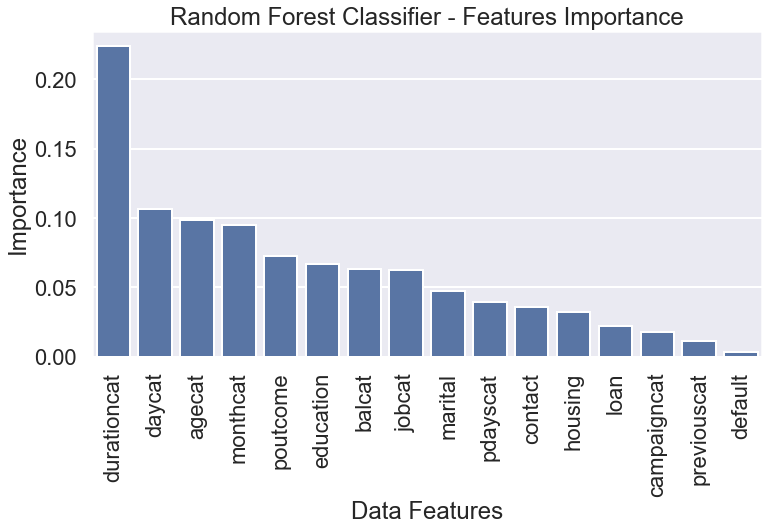

In [59]:
plt.figure(figsize=(12,6))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='b')
plt.xlabel("Data Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Random Forest Classifier - Features Importance")

## Hyperparameter Tuning using GridSearchCV

Importing GridSearchCV (cross validation)

In [74]:
from sklearn.model_selection import GridSearchCV

Making grid of parameters and running GridSearch CV

In [76]:
 from sklearn.ensemble import RandomForestClassifier

In [77]:
param_grid1 = {"n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [1, 5, 10, 15, 20, 25, 30],
           "min_samples_leaf" : [1, 2, 4, 6, 8, 10]}

RF = RandomForestClassifier(random_state=100)
# Instantiate the GridSearchCV object: logreg_cv
RF_cv1 = GridSearchCV(RF, param_grid1, cv=5,scoring='accuracy',n_jobs=4)

# Fit it to the data
RF_cv1.fit(xtrain,ytrain)

#RF_cv1.cv_results_, 
RF_cv1.best_params_, RF_cv1.best_score_

({'max_depth': 20, 'min_samples_leaf': 4, 'n_estimators': 63},
 0.8989477675609062)

So we found **'max_depth': 20, 'min_samples_leaf': 4, 'n_estimators': 63** as optimum parameters

Let's try new set of parameter values near to optimum.

In [78]:
param_grid2 = {"n_estimators" : [9,12,15,18,21,24,27],
           "max_depth" : [5,6,7,8,9,10,11,12,13,14,15],
           "min_samples_leaf" : [1,2,3,4]}

RF = RandomForestClassifier(random_state=100)
# Instantiate the GridSearchCV object: logreg_cv
RF_cv2 = GridSearchCV(RF, param_grid2, cv=5,scoring='accuracy',n_jobs=4)

# Fit it to the data
RF_cv2.fit(xtrain,ytrain)

#RF_cv2.grid_scores_, 
RF_cv2.best_params_, RF_cv2.best_score_

({'max_depth': 14, 'min_samples_leaf': 4, 'n_estimators': 24},
 0.8998009289980093)

 So we found **'max_depth': 14, 'min_samples_leaf': 4, 'n_estimators': 24** as optimum parameters. and these parameter gives result of nearly 90%. so we choose it and not go for more optimal solution.

### Tuned Random Forest (Grid search)

In [79]:
RF_grid = RF_cv2.best_estimator_

In [80]:
#train the algorithm on training dataset
RF_grid.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=24, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [81]:
#Predict the target variable from test data throughgrid search tunned random forest classifier
rf_pred_t = RF_grid.predict(xtest)
rf_pred_prb_t=RF_grid.predict_proba(xtest)[:,1]

### Task 15: Find Accuracy for Tuned Random Forest

In [82]:
#Performance evaluation on accuracy metric
accuracy_rf_t = accuracy_score(ytest, rf_pred_t)
print("Accuracy after tuning: {}".format(accuracy_rf_t))

Accuracy after tuning: 0.8994396933058095


### Task 16: Find Recall for Tuned Random Forest

In [83]:
#Perforamnce evaluation on recall measure
recall_rf_t=recall_score(ytest, rf_pred_t)
recall_rf_t

0.30082330588980366

### Task 17: Find Precision for Tuned Random Forest

In [84]:
#Perofrmance evaluation on precision measure
precision_rf_t=precision_score(ytest, rf_pred_t)
precision_rf_t

0.6462585034013606

### Task 18: Find F1 Score

In [85]:
#Performance evaluation on f1 score measure
rf_t_f1=f1_score(ytest, rf_pred_t)
rf_t_f1

0.4105445116681072

### Task 19: Print Classification Report for Tuned Random Forest

In [86]:
#write code here 
print(classification_report(ytest, rf_pred_t))

             precision    recall  f1-score   support

          0       0.91      0.98      0.95     11985
          1       0.65      0.30      0.41      1579

avg / total       0.88      0.90      0.88     13564



### ROC Curve for Tuned Random Forest

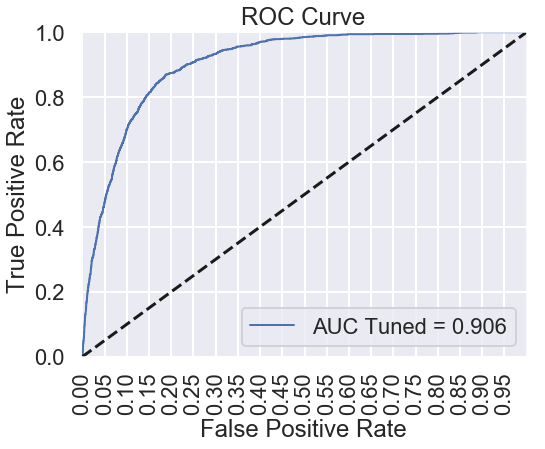

In [87]:
auc_rf_t=roc_auc_score(ytest,rf_pred_prb_t)
fpr,tpr,threshold=roc_curve(ytest,rf_pred_prb_t)
plot_roc_curve(fpr,tpr,label='AUC Tuned = %0.3f'% auc_rf_t)

In [88]:
features_tuple=list(zip(X.columns,RF_grid.feature_importances_))

In [89]:
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])

In [90]:
feature_imp=feature_imp.sort_values("Importance",ascending=False)

Text(0.5,1,'Tuned Random Forest grid search Classifier - Features Importance')

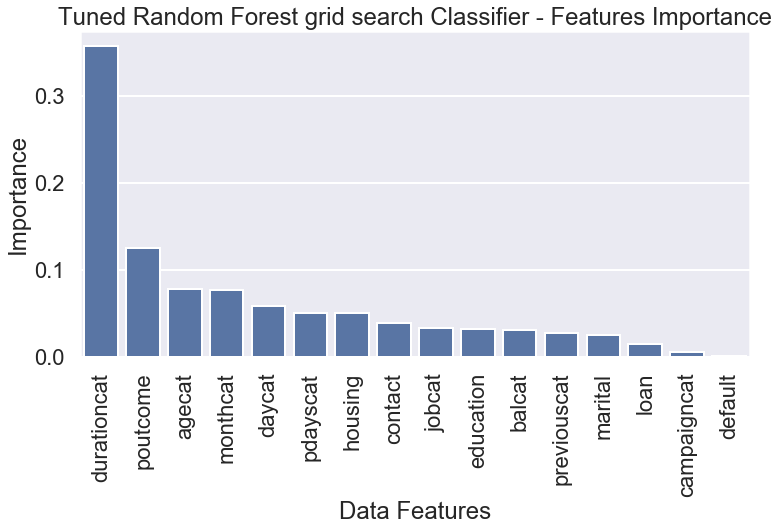

In [91]:
plt.figure(figsize=(12,6))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='b')
plt.xlabel("Data Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Tuned Random Forest grid search Classifier - Features Importance")

### Hyperparameters Tuning Using Randomized Search

In [92]:
from sklearn.model_selection import RandomizedSearchCV

In [93]:
rf_rs = RandomForestClassifier(random_state=100)

In [94]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

In [95]:
random_grid1 = {"n_estimators" : n_estimators,
           "max_depth" : max_depth,
           "min_samples_split" :min_samples_split}

In [96]:
rf_random = RandomizedSearchCV(estimator = rf_rs, param_distributions = random_grid1, n_iter = 50, cv = 5, verbose=2, random_state=100)
# Fit the random search model
rf_random.fit(xtrain, ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=450, min_samples_split=10, max_depth=80 ............
[CV]  n_estimators=450, min_samples_split=10, max_depth=80, total=  15.1s
[CV] n_estimators=450, min_samples_split=10, max_depth=80 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.6s remaining:    0.0s


[CV]  n_estimators=450, min_samples_split=10, max_depth=80, total=  15.5s
[CV] n_estimators=450, min_samples_split=10, max_depth=80 ............
[CV]  n_estimators=450, min_samples_split=10, max_depth=80, total=  16.1s
[CV] n_estimators=450, min_samples_split=10, max_depth=80 ............
[CV]  n_estimators=450, min_samples_split=10, max_depth=80, total=  16.1s
[CV] n_estimators=450, min_samples_split=10, max_depth=80 ............
[CV]  n_estimators=450, min_samples_split=10, max_depth=80, total=  14.9s
[CV] n_estimators=560, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=30, total=  20.2s
[CV] n_estimators=560, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=30, total=  18.7s
[CV] n_estimators=560, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=30, total=  19.1s
[CV] n_estimators=560, min_samples_split=5, max_depth=30 ..

[CV]  n_estimators=890, min_samples_split=2, max_depth=40, total=  32.5s
[CV] n_estimators=890, min_samples_split=2, max_depth=40 .............
[CV]  n_estimators=890, min_samples_split=2, max_depth=40, total=  32.5s
[CV] n_estimators=560, min_samples_split=5, max_depth=80 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=80, total=  19.4s
[CV] n_estimators=560, min_samples_split=5, max_depth=80 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=80, total=  19.3s
[CV] n_estimators=560, min_samples_split=5, max_depth=80 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=80, total=  19.2s
[CV] n_estimators=560, min_samples_split=5, max_depth=80 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=80, total=  19.5s
[CV] n_estimators=560, min_samples_split=5, max_depth=80 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=80, total=  19.5s
[CV] n_estimators=780, min_samples_split=10, max_depth=50 .....

[CV]  n_estimators=780, min_samples_split=2, max_depth=60, total=  29.6s
[CV] n_estimators=780, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=780, min_samples_split=2, max_depth=60, total=  28.8s
[CV] n_estimators=780, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=780, min_samples_split=2, max_depth=60, total=  28.6s
[CV] n_estimators=780, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=780, min_samples_split=2, max_depth=60, total=  29.9s
[CV] n_estimators=780, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=780, min_samples_split=2, max_depth=60, total=  29.1s
[CV] n_estimators=340, min_samples_split=5, max_depth=110 ............
[CV]  n_estimators=340, min_samples_split=5, max_depth=110, total=  12.3s
[CV] n_estimators=340, min_samples_split=5, max_depth=110 ............
[CV]  n_estimators=340, min_samples_split=5, max_depth=110, total=  12.2s
[CV] n_estimators=340, min_samples_split=5, max_depth=110 ...

[CV]  n_estimators=340, min_samples_split=5, max_depth=20, total=  11.1s
[CV] n_estimators=340, min_samples_split=5, max_depth=20 .............
[CV]  n_estimators=340, min_samples_split=5, max_depth=20, total= 1.3min
[CV] n_estimators=340, min_samples_split=5, max_depth=20 .............
[CV]  n_estimators=340, min_samples_split=5, max_depth=20, total=   7.4s
[CV] n_estimators=890, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=890, min_samples_split=5, max_depth=30, total=  17.1s
[CV] n_estimators=890, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=890, min_samples_split=5, max_depth=30, total=  16.6s
[CV] n_estimators=890, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=890, min_samples_split=5, max_depth=30, total=  16.5s
[CV] n_estimators=890, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=890, min_samples_split=5, max_depth=30, total=  25.8s
[CV] n_estimators=890, min_samples_split=5, max_depth=30 ......

[CV]  n_estimators=340, min_samples_split=10, max_depth=100, total=   6.2s
[CV] n_estimators=340, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=340, min_samples_split=2, max_depth=60, total=   7.1s
[CV] n_estimators=340, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=340, min_samples_split=2, max_depth=60, total=  10.5s
[CV] n_estimators=340, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=340, min_samples_split=2, max_depth=60, total=   7.8s
[CV] n_estimators=340, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=340, min_samples_split=2, max_depth=60, total=   7.8s
[CV] n_estimators=340, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=340, min_samples_split=2, max_depth=60, total=   7.6s
[CV] n_estimators=670, min_samples_split=2, max_depth=90 .............
[CV]  n_estimators=670, min_samples_split=2, max_depth=90, total=  13.7s
[CV] n_estimators=670, min_samples_split=2, max_depth=90 ....

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 91.1min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=1,
          param_distributions={'n_estimators': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=100, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

**Selecting the best classifier**

In [97]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=890, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [98]:
clf_rf_rand=rf_random.best_estimator_

In [99]:
#train the radom search tunned random forest classifier on dataset
clf_rf_rand.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=890, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [100]:
#Predict the target variable of test data through trainned random search tunned random forest classifier.
pred_rf_rand=clf_rf_rand.predict(xtest)

In [101]:
prb_rf_rand=clf_rf_rand.predict_proba(xtest)[:,1]

### Task 20: Find the Accuracy of Tuned Random Forest through Randomized Search

In [102]:
#Perforamnce on accuracy measur
accuracy_rf_r= accuracy_score(ytest,pred_rf_rand)
accuracy_rf_r

0.8994396933058095

### Task 21: Find the Precision of Tuned Random Forest through Randomized Search

In [103]:
#Performance on precision measure
precision_rf_r=precision_score(ytest,pred_rf_rand)
precision_rf_r

0.6149732620320856

### Task 22: Find the Recall of Tuned Random Forest through Randomized Search

In [104]:
#Performance on recall measure
recall_rf_r=recall_score(ytest,pred_rf_rand)
recall_rf_r

0.3641545281823939

### Task 23: Find the F1-Score of Tuned Random Forest through Randomized Search

In [105]:
#Performance on f1 score measure
f1_rf_r=f1_score(ytest,pred_rf_rand)
f1_rf_r

0.45743834526650756

### Task 24: Print the Classification Report of Tuned Random Forest through Randomized Search

In [106]:
#write code here 
print(classification_report(ytest,pred_rf_rand))


             precision    recall  f1-score   support

          0       0.92      0.97      0.94     11985
          1       0.61      0.36      0.46      1579

avg / total       0.88      0.90      0.89     13564



### ROC Curve

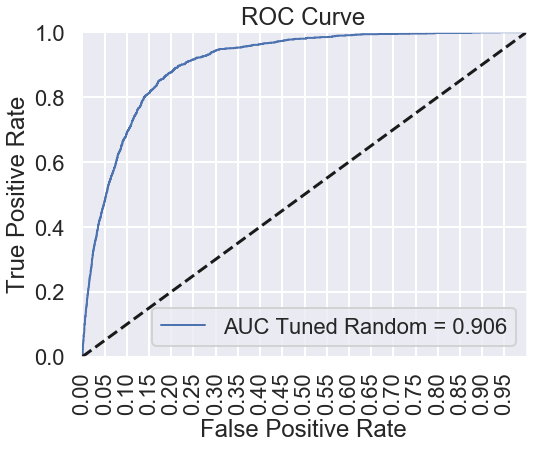

In [107]:
auc_rf_r=roc_auc_score(ytest,prb_rf_rand)
fpr,tpr,threshold=roc_curve(ytest,prb_rf_rand)
plot_roc_curve(fpr,tpr,label='AUC Tuned Random = %0.3f'% auc_rf_r)

In [108]:
features_tuple=list(zip(X.columns,clf_rf_rand.feature_importances_))

In [109]:
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])

In [110]:
feature_imp=feature_imp.sort_values("Importance",ascending=False)

Text(0.5,1,'Tuned Random Forest randomized search Classifier- Features Importance')

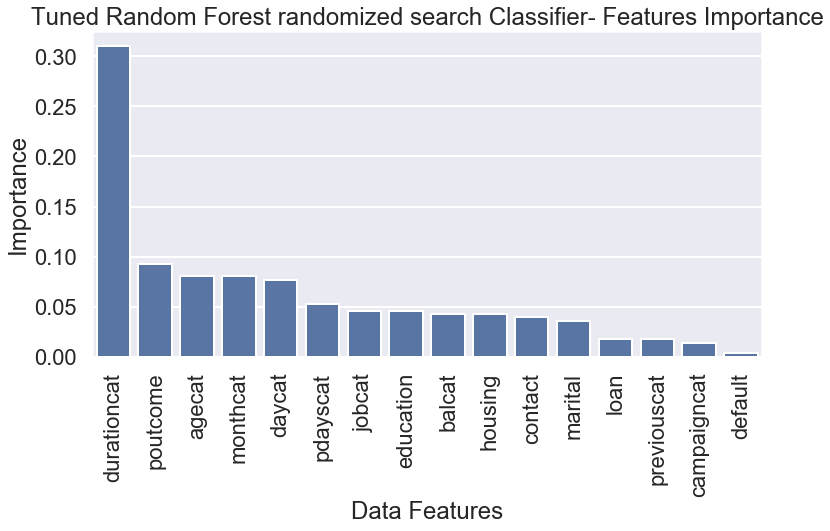

In [111]:
plt.figure(figsize=(12,6))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='b')
plt.xlabel("Data Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Tuned Random Forest randomized search Classifier- Features Importance")

# Ada Boost

In [7]:
from sklearn.ensemble import AdaBoostClassifier

C:\Users\fahim\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [8]:
#train adaboost classiifer on data set.
clf_adb = AdaBoostClassifier(random_state=100)
clf_adb.fit(xtrain, ytrain) 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=100)

In [9]:
#Predict target variable from test data through trainned adaboost classifier
pred_clf_adb=clf_adb.predict(xtest)

In [10]:
adb_pred_prb=clf_adb.predict_proba(xtest)[:,1]

### Task 25: Find Accuracy for Ada Boost

In [16]:
#Performance on accuracy measure
accuracy_adb=accuracy_score(ytest,pred_clf_adb)
accuracy_adb

0.8945738720141552

### Task 26: Find Precision for Ada Boost

In [17]:
#Performance on precision measure 
precision_adb=precision_score(ytest,pred_clf_adb)
precision_adb

0.5892215568862276

### Task 27: Find Recall for Ada Boost

In [19]:
#Performance on recall measure
recall_adb=recall_score(ytest,pred_clf_adb)
recall_adb

0.311589613679544

### Task 28: Find F1 Score for Ada Boost

In [65]:
#Perofrmance on f1 score measure
f1_adb=f1_score(ytest,pred_clf_adb)
f1_adb

0.4076222038111019

### Task 29: Print Classification Report for Ada Boost

In [66]:
#write code here 
print(classification_report(ytest,pred_clf_adb))

             precision    recall  f1-score   support

          0       0.91      0.97      0.94     11985
          1       0.59      0.31      0.41      1579

avg / total       0.88      0.89      0.88     13564



### ROC Curve

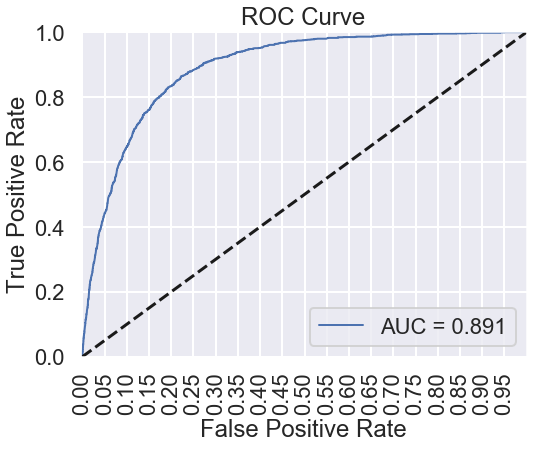

In [67]:
auc_adb=roc_auc_score(ytest,adb_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,adb_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_adb)

In [68]:
features_tuple=list(zip(X.columns,clf_adb.feature_importances_))

In [69]:
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])

In [70]:
feature_imp=feature_imp.sort_values("Importance",ascending=False)

Text(0.5,1,'Ada Boost Classifier - Features Importance')

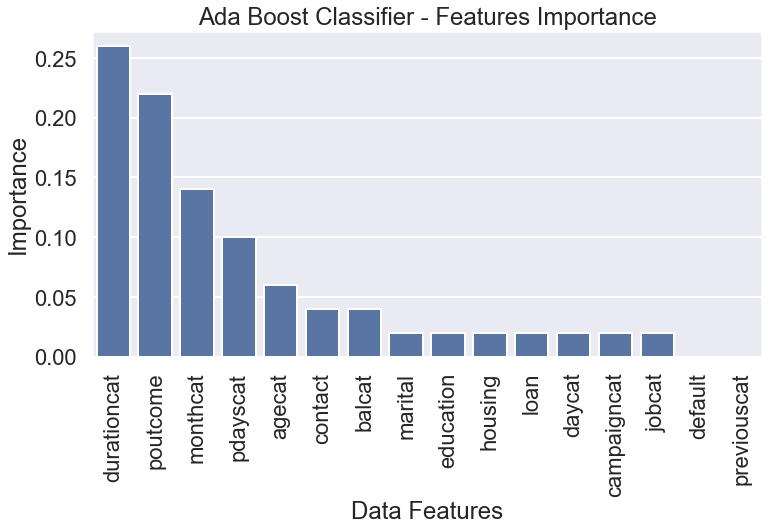

In [71]:
plt.figure(figsize=(12,6))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='b')
plt.xlabel("Data Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Ada Boost Classifier - Features Importance")

# XGBoost

## Extreme Gradient Boosting Algorithm

In [42]:
import xgboost as xgb

In [43]:
clf_xgb = xgb.XGBClassifier(seed=25,nthread=1,random_state=100)

In [44]:
clf_xgb.fit(xtrain, ytrain)

C:\Users\fahim\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:37:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
       objective='binary:logistic', random_state=100, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=25, subsample=1,
       tree_method='exact', use_label_encoder=True, validate_parameters=1,
       verbosity=None)

In [45]:
# for prediction some test dataset
xgb_pred = clf_xgb.predict(xtest)
xgb_pred_prb=clf_xgb.predict_proba(xtest)[:,1]

C:\Users\fahim\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Task 30: Find Accuracy of XGBoost

In [46]:
#Performance on accuracy measure
accuracy_xgb = accuracy_score(ytest,xgb_pred)
print("Accuracy: {}".format(accuracy_xgb))

Accuracy: 0.8986287230905338


### Task 31: Find  Recall of XGBoost

In [47]:
#Performance on recall measure
recall_xgb = recall_score(ytest,xgb_pred)
recall_xgb

0.42685243825205826

###  Task 32: Find  Precision of XGBoost

In [48]:
#Performance on precision measure
precision_xgb = precision_score(ytest,xgb_pred)
precision_xgb

0.5891608391608392

### Task 33: Find F1 Score XGB

In [49]:
#Performance on f1 score measure
xgb_f1=f1_score(ytest,xgb_pred)
xgb_f1

0.4950422328314359

### Task 34: Print Classification Report of XGBoost

In [50]:
#write code here 
print(classification_report(ytest,xgb_pred))

             precision    recall  f1-score   support

          0       0.93      0.96      0.94     11985
          1       0.59      0.43      0.50      1579

avg / total       0.89      0.90      0.89     13564



### ROC Curve

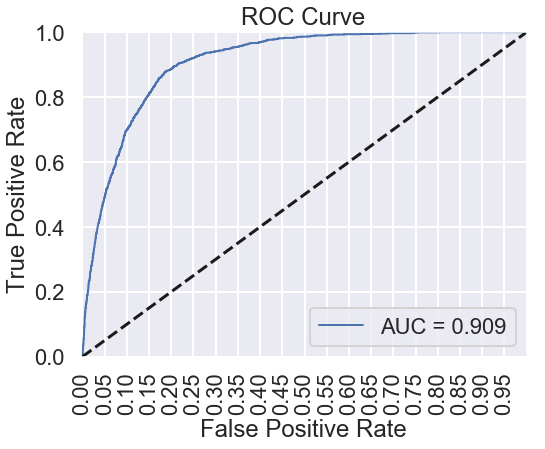

In [51]:
auc_xgb=roc_auc_score(ytest,xgb_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,xgb_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_xgb)
 

In [52]:
features_tuple=list(zip(X.columns,clf_xgb.feature_importances_))

In [53]:
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])

In [54]:
feature_imp=feature_imp.sort_values("Importance",ascending=False)

Text(0.5,1,'XG Boost Classifier - Features Importance')

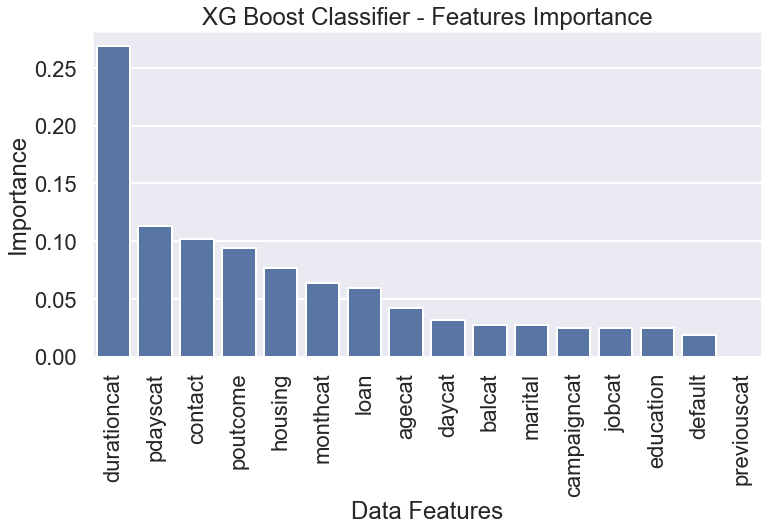

In [56]:
plt.figure(figsize=(12,6))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='b')
plt.xlabel("Data Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("XG Boost Classifier - Features Importance")

# Comparison

In [110]:
comparison_dict={"Algorithm":["Decision Tree","Random Forest","Tuned Random Forest(Grid)","Tuned Random Forest(Random)","XGBoost","Ada Boost"],
                 "Accuracy":[accuracy_dt,accuracy_rf,accuracy_rf_t,accuracy_rf_r,accuracy_xgb,accuracy_adb],
                 "Precision":[precision_dt,precision_rf,precision_rf_t,precision_rf_r,precision_xgb,precision_adb],
                 "Recall":[recall_dt,recall_rf,recall_rf_t,recall_rf_r,recall_xgb,recall_adb],
                 "AUC":[auc_dt,auc_rf,auc_rf_t,auc_rf_r,auc_xgb,auc_adb],
                 "F1 Score":[dt_f1,rf_f1,rf_t_f1,f1_rf_r,xgb_f1,f1_adb]
                }
comparison_dict

{'Algorithm': ['Decision Tree',
  'Random Forest',
  'Tuned Random Forest(Grid)',
  'Tuned Random Forest(Random)',
  'XGBoost',
  'Ada Boost'],
 'Accuracy': [0.8845473311707461,
  0.8894131524624005,
  0.8994396933058095,
  0.8994396933058095,
  0.8986287230905338,
  0.8945738720141552],
 'Precision': [0.5078979343863913,
  0.536205316223648,
  0.6462585034013606,
  0.6149732620320856,
  0.5891608391608392,
  0.5892215568862276],
 'Recall': [0.26472450918302726,
  0.37048765041165294,
  0.30082330588980366,
  0.3641545281823939,
  0.42685243825205826,
  0.5892215568862276],
 'AUC': [0.7919621925549221,
  0.8526684056992289,
  0.9062154693578076,
  0.9061138276339196,
  0.909389137731009,
  0.8910103747480425],
 'F1 Score': [0.3480432972522898,
  0.4382022471910112,
  0.4105445116681072,
  0.45743834526650756,
  0.4950422328314359,
  0.4076222038111019]}

In [111]:
comparison_dict

{'Algorithm': ['Decision Tree',
  'Random Forest',
  'Tuned Random Forest(Grid)',
  'Tuned Random Forest(Random)',
  'XGBoost',
  'Ada Boost'],
 'Accuracy': [0.8845473311707461,
  0.8894131524624005,
  0.8994396933058095,
  0.8994396933058095,
  0.8986287230905338,
  0.8945738720141552],
 'Precision': [0.5078979343863913,
  0.536205316223648,
  0.6462585034013606,
  0.6149732620320856,
  0.5891608391608392,
  0.5892215568862276],
 'Recall': [0.26472450918302726,
  0.37048765041165294,
  0.30082330588980366,
  0.3641545281823939,
  0.42685243825205826,
  0.5892215568862276],
 'AUC': [0.7919621925549221,
  0.8526684056992289,
  0.9062154693578076,
  0.9061138276339196,
  0.909389137731009,
  0.8910103747480425],
 'F1 Score': [0.3480432972522898,
  0.4382022471910112,
  0.4105445116681072,
  0.45743834526650756,
  0.4950422328314359,
  0.4076222038111019]}

In [112]:
comparison=pd.DataFrame(comparison_dict)
comparison.sort_values(['Recall','Accuracy', 'AUC'], ascending=False)

,Algorithm,Accuracy,Precision,Recall,AUC,F1 Score
5,Ada Boost,0.894574,0.589222,0.589222,0.891010,0.407622
4,XGBoost,0.898629,0.589161,0.426852,0.909389,0.495042
1,Random Forest,0.889413,0.536205,0.370488,0.852668,0.438202
3,Tuned Random Forest(Random),0.899440,0.614973,0.364155,0.906114,0.457438
2,Tuned Random Forest(Grid),0.899440,0.646259,0.300823,0.906215,0.410545
0,Decision Tree,0.884547,0.507898,0.264725,0.791962,0.348043


# Submission 

### Conclusion:

I used all my knowledge,skills and strength to learn for the fullfillment of my aims of research which were:

1) Process and analyze a big data with visualization and exploratory analysis for future decision making.

2) Implementing and comparing different classifiers on a real world normalized dataset to get the best classification performing    classifier on the basis of some metrices.

For aim 1 i used differnt python packages for exploratory data analysis and visualization to reach to many concluding insights of choosen dataset.some of are as follows:
* The main dataset of bank marketing have 45211 rows and 17 columns and built in csv format.
* different columns with differnt data types which includes binary, numeric, object etc
* There wer no missing values in the data set.
* 'y' column was our target variable which had 2 binary values.5289 counts of value 'yes' and 39922 counts of value 'no'.
* The data spreads on a range of minimum 18 and maximum 95 years of age in 'age' column. and the age column data is right skewed with maximum counts of 32 years which are 2085.
* 'job' column have 12 unique values with 9732 (highest) counts of management type job.
* 'marital' column have 3 unique values with 27214 (highest) counts of married type status.
* 'education' column have 4 unique values with 23202 (highest) counts of secondary type status.
* 'default' column have 2 unique values with 44396 (highest) counts of no type status.
* 'balance' column ranges from -8019 to 102127 euros in our dataset. The mean value for balance column is 1362 euros.
* 'housing' column have 2 unique values with 25130 (highest) counts of yes type status.
* 'loan' column have 2 unique values with 37967 (highest) counts of no type status.
* 'contact' column have 3 unique values with 29285 (highest) counts of cellular type status.
* 'poutcome' column have 4 unique values with 36959 (highest) counts of unknown status.
* 'pdays' column have numeric values with 36954 (highest) counts of -1 value, which represents that didn't contacted in previous campaign.
* visualization analysis suggests that positive proportion of yes value among the people who has success status in previous campaign outcome ('poutcome' column).
* Good percentage proportion of retired and student type of job status people with refernce to target variable subscription (yes). Athough counts of management job type people are higher to subscribe 'yes' in target variable.
* People with no loan and no mortgage are higher in counts with reference to 'yes' value of target vairable.
* counts ofsecondary education people are higher with refernce to 'yes' value of target variable but percentage proportion of tertiary education people is good than others in accepting the product during campaign.
* cellular contact people are higher in counts to accept 'yes' in current campaign. cellular contact people are also higher in counts which have success status in poutcome (previous campaign).
* Although people with married marital status are higher in counts but percentage proportion of single marital status people in subscribing 'yes' value of target variable is good than other marital status people.
* unknown and success type status in poutcome are good in counts to accept 'yes' value in current campaign which is 'y' (target variable).but the percentage proportion shows more than 60% of people with success poutcome status are willing and subscribe 'yes' in current campaign.
* middle-aged type status people in agecat column are higher in counts but percentage proportion of senior citizen type status people to subscribe 'yes' value is good and much higher than others. percentage proportion of senior citizen to success type status in poutcome (previous campaign outcome)is also very good and higher than others.
* Percentage proportion of people with 10+ minutes call duration category in duration column is good with reference to 'yes' value of target variable.

I have also implemented techniques to categorize the unique values into different categories to normalize the dataset for implementation of machine learning algorithms.I have processed the datset and normalize not only for supervised leaning algorithms but unsupervised and semi supervised algorithms can also easily implemented on my normalized dataset easily and would give us results. (future work).
I also used label encode to change the datatype of categorical data columns from object to integer, which is highly recommended for unsupervised and semi-supervised learning algorithms. (clustering, association mining etc)

After all analysis which includes exploration, visualization, data cleaning, label encoding, feature engineering, i implemented following classifiers on training data and did some prediction of target variable on testing data.
* Decision tree
* Random Forest 
* Tunned Random Forest (Grid Search CV)
* Tunned Random Forest (Random Search CV)
* AdaBoost
* XGBoost (Extreme Gradient)

For performance measure of choosen classifiers on provided dataset , i use accuracy, precison, recall, f1 score and AUC score as evaluative metrices.
Overall accuracy for prediction is good of all classifiers. The values of precion and recall are not considerable although we ahave highly imbalanced datset.

### succeeding work

For future work, i would try out some other classifiers with fuzzy logic which is not used in other literature for classification of real world datset for target marketing problem. i also have strong intentions of applying unsupervised learning algorithm for clustering on real world dataset for market segment problem. i have intentions of doing work on solving market, bussiness based problem through processing historic big data with different machine learning algorithms